# Sentiment Analysis on Amaon Reviews
Here, in this notebook we will be doing some sentiment analysis in python using two different techniques:

 - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
 - Roberta Pretrained Model from 🤗
 - Huggingface Pipeline

In [2]:
# Import necessary libraries

# !pip install nltk
import tensorflow as tf  
import torch
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
# nltk.download('punkt')

## 1. Read in Data and doing NLTK Basics

In [5]:
# read the data
# NOTE: The origional dataset has about half a million rows which was just a little large for my celeron processor to handle, hence chopped down on size.
df = pd.read_csv("Reviews.csv")
df.shape

(2478, 10)

In [4]:
# Doing analysis on only the 1000 rows
df = df.head(1000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


### Quick EDA

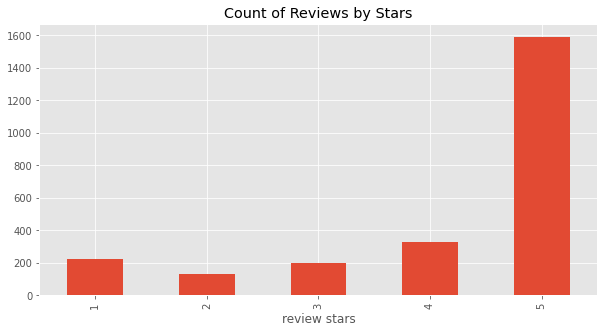

In [6]:
ax=df["Score"].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',
          figsize=(10, 5) )
ax.set_xlabel('review stars')
plt.show()

### Basic NLTK

In [6]:
df.describe ()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,1.230000,1.653000,4.179000,1.288389e+09
std,288.819436,2.690788,3.156034,1.325412,5.093025e+07
min,1.000000,0.000000,0.000000,1.000000,1.107821e+09
25%,250.750000,0.000000,0.000000,4.000000,1.253945e+09
50%,500.500000,0.000000,1.000000,5.000000,1.300752e+09
75%,750.250000,1.000000,2.000000,5.000000,1.330927e+09
max,1000.000000,43.000000,47.000000,5.000000,1.351210e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [8]:
# basic nltk
example= df['Text'][234]
example

"These things are huge! I love the way the crystals crunch, and the flavor is not too overpowering or too subtle. This lemony flavor is my favorite--it's good on almost everything. You'll have plenty of flavored salt for a long time if you buy this."

In [9]:
# forming list of tokebs
nltk.word_tokenize(example)

['These',
 'things',
 'are',
 'huge',
 '!',
 'I',
 'love',
 'the',
 'way',
 'the',
 'crystals',
 'crunch',
 ',',
 'and',
 'the',
 'flavor',
 'is',
 'not',
 'too',
 'overpowering',
 'or',
 'too',
 'subtle',
 '.',
 'This',
 'lemony',
 'flavor',
 'is',
 'my',
 'favorite',
 '--',
 'it',
 "'s",
 'good',
 'on',
 'almost',
 'everything',
 '.',
 'You',
 "'ll",
 'have',
 'plenty',
 'of',
 'flavored',
 'salt',
 'for',
 'a',
 'long',
 'time',
 'if',
 'you',
 'buy',
 'this',
 '.']

In [10]:
# by tokenizing computers can interpret what we are saying
tokens=nltk.word_tokenize(example)

In [11]:
# parts of speech tags
tagged=nltk.pos_tag(tokens)
tagged
# these are the abbrivations we can find in nltk documentation

[('These', 'DT'),
 ('things', 'NNS'),
 ('are', 'VBP'),
 ('huge', 'JJ'),
 ('!', '.'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('the', 'DT'),
 ('crystals', 'NNS'),
 ('crunch', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('flavor', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('too', 'RB'),
 ('overpowering', 'VBG'),
 ('or', 'CC'),
 ('too', 'RB'),
 ('subtle', 'JJ'),
 ('.', '.'),
 ('This', 'DT'),
 ('lemony', 'JJ'),
 ('flavor', 'NN'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('favorite', 'JJ'),
 ('--', ':'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('on', 'IN'),
 ('almost', 'RB'),
 ('everything', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ("'ll", 'MD'),
 ('have', 'VB'),
 ('plenty', 'NN'),
 ('of', 'IN'),
 ('flavored', 'JJ'),
 ('salt', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('long', 'JJ'),
 ('time', 'NN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('buy', 'VBP'),
 ('this', 'DT'),
 ('.', '.')]

In [12]:
# nltk.download('maxent_ne_chunker')

In [13]:
# nltk.download('words')

In [14]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()
# pretty print

(S
  These/DT
  things/NNS
  are/VBP
  huge/JJ
  !/.
  I/PRP
  love/VBP
  the/DT
  way/NN
  the/DT
  crystals/NNS
  crunch/NN
  ,/,
  and/CC
  the/DT
  flavor/NN
  is/VBZ
  not/RB
  too/RB
  overpowering/VBG
  or/CC
  too/RB
  subtle/JJ
  ./.
  This/DT
  lemony/JJ
  flavor/NN
  is/VBZ
  my/PRP$
  favorite/JJ
  --/:
  it/PRP
  's/VBZ
  good/JJ
  on/IN
  almost/RB
  everything/NN
  ./.
  You/PRP
  'll/MD
  have/VB
  plenty/NN
  of/IN
  flavored/JJ
  salt/NN
  for/IN
  a/DT
  long/JJ
  time/NN
  if/IN
  you/PRP
  buy/VBP
  this/DT
  ./.)


# Techniques to do sentiment analysis

## 1. VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [15]:
#  it works on particular words and says how pos/neg/nu the word is. doesnt account for relationships between words.
# we will remove stop words like the, is etc.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()
sia

In [16]:
# test runs
sia.polarity_scores('i am very happy that i am sad')
# compund means total scores

{'neg': 0.279, 'neu': 0.361, 'pos': 0.36, 'compound': 0.2247}

In [17]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8655}

In [18]:
# run the polarity scores for the entire database
# iterrate

res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
# lets store it in pandas dataframe
vaders= pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})  #we renamed because we want to merge on Id
vaders=vaders.merge(df, how='left')

### Plot vader results


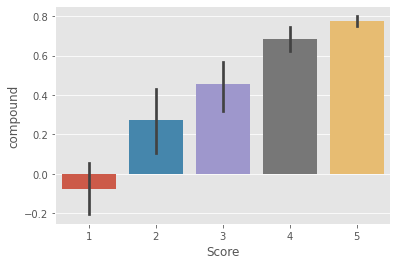

In [20]:
# plot vader results

ax=sns.barplot(data=vaders, x='Score', y='compound')
plt.show()

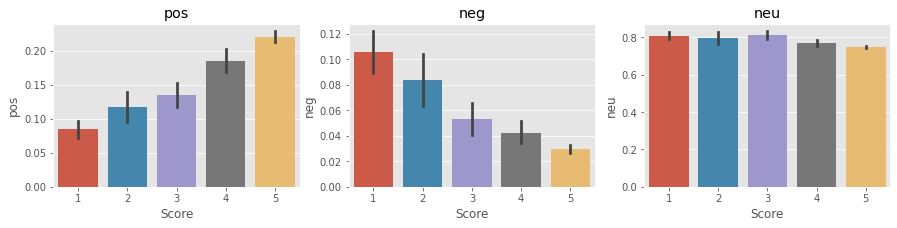

In [21]:
fig, axs= plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[2])

axs[0].set_title('pos')
axs[1].set_title('neg')
axs[2].set_title('neu')
plt.show()

In [22]:
# pip install transformers

## Roberta Pretrained Model
 - Hugging face transformer model accounts for the words but also its context, which is not seen in vader.

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
# pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
# vader results on examples
print(example)
sia.polarity_scores(example)

These things are huge! I love the way the crystals crunch, and the flavor is not too overpowering or too subtle. This lemony flavor is my favorite--it's good on almost everything. You'll have plenty of flavored salt for a long time if you buy this.


{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8655}

In [26]:
# !pip install --upgrade tensorflow

In [27]:
# run for roberta model
encoded_text=tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,  4528,   383,    32,  1307,   328,    38,   657,     5,   169,
             5, 30936, 14291,     6,     8,     5, 12117,    16,    45,   350,
         37833,   154,    50,   350, 12405,     4,   152,  2084, 27583, 12117,
            16,   127,  2674,  5579,   405,    18,   205,    15,   818,   960,
             4,   370,   581,    33,  2710,     9, 35124,  6740,    13,    10,
           251,    86,   114,    47,   907,    42,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [28]:
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.4953, -0.6946,  4.0777]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
# convert scores into numpy array
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores

array([0.00138401, 0.00837832, 0.99023765], dtype=float32)

In [30]:
scores_dic={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dic)
# by comparing roberta with vader we can see that it is much more powerfull than vader!

{'roberta_neg': 0.0013840125, 'roberta_neu': 0.008378321, 'roberta_pos': 0.99023765}


In [31]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dic={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
    return scores_dic

In [32]:
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        vader_results= sia.polarity_scores(text)
    #     renaming the vader results from pos neg to vader_{key}
        vader_result_rename = {}
        for key, value in vader_results.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
    #         adding both the dict together
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [33]:
results_df= pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})  #we renamed because we want to merge on Id
results_df=results_df.merge(df, how='left')

In [34]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
results_df['Text'][3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

## compare results between models

In [36]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

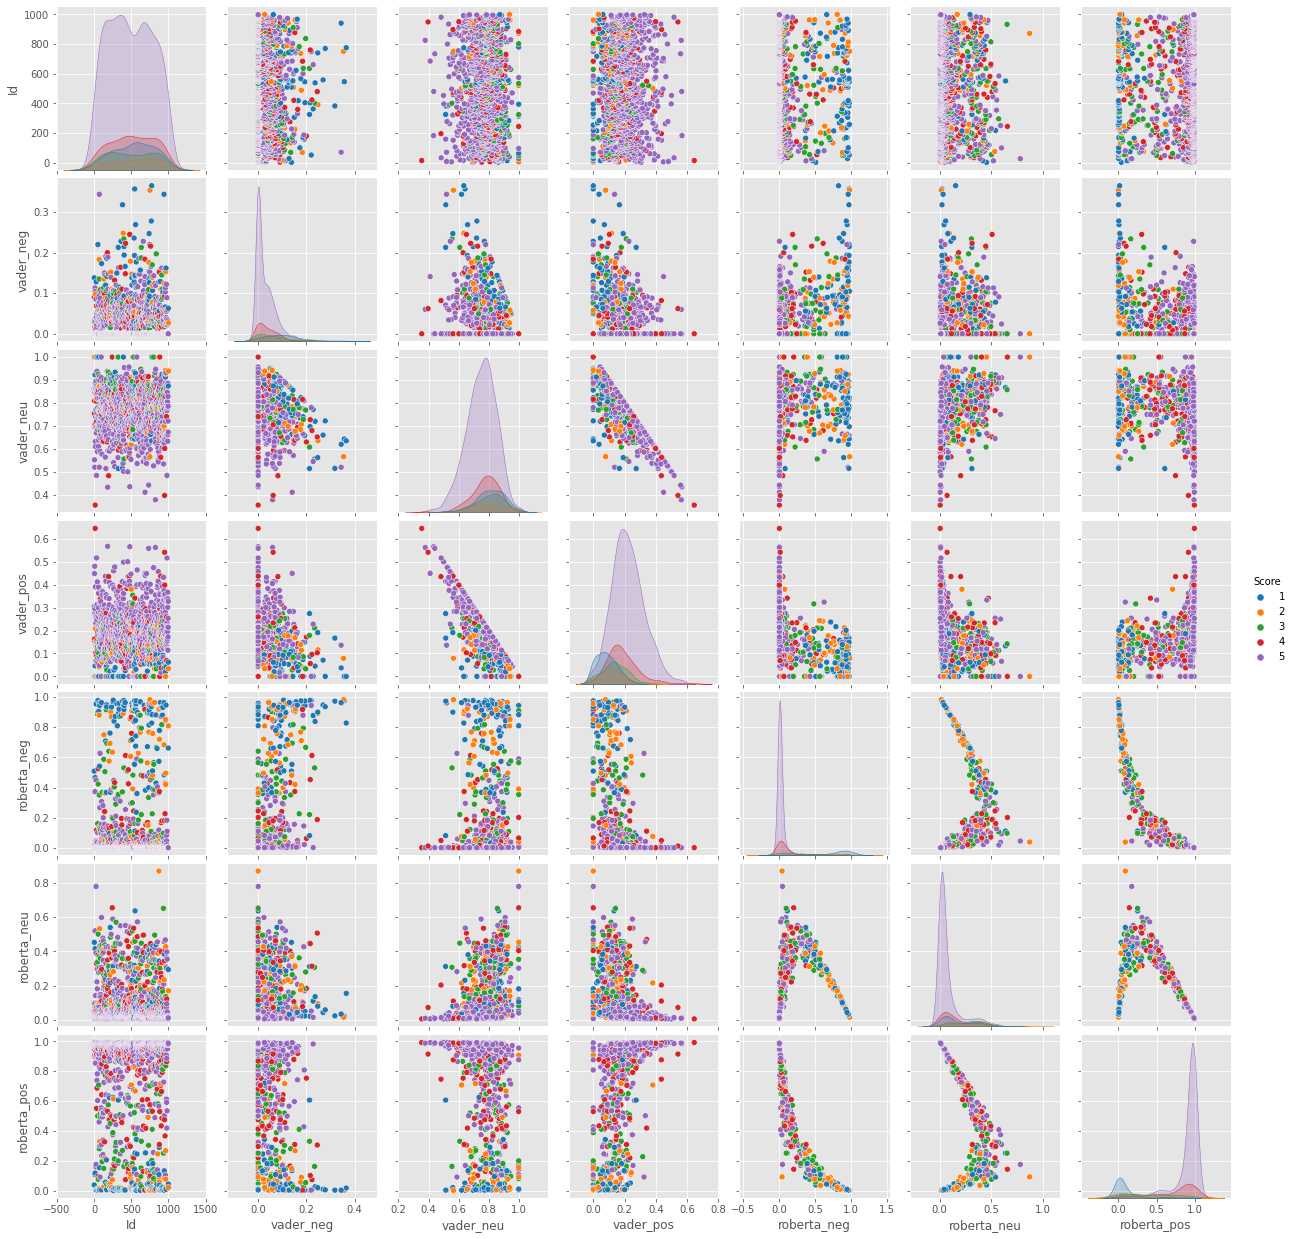

In [37]:
sns.pairplot(data=results_df, vars=['Id', 'vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## review some examples


In [42]:
results_df.query('Score==1') \
    .sort_values('roberta_pos',ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [43]:
results_df.query('Score==1') \
    .sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [44]:
# similarly you can do the negative


## Transformers pipeline


In [45]:
from transformers import pipeline
# quick way to do sentiment anslysis

In [ ]:
sent_pipe= pipeline('sentiment-analysis")